## Comparison of the number of passes at measurement points in Gdansk and Cracow in 2019.  

#### Loading libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize']=(18,10)

### Definitions

In [3]:
seasons = {'Spring':[1],'Summer':[2],'Autumn':[3],'Winter':[4]}

def seasons_def(x):
    for key, value in seasons.items():
        if x in value:
            return (key)

In [4]:
def time_of_day(x):
    if x>21 or x<6: return 1 #'22:00 - 06:00'
    if x>5 and x<10: return 2 #'06:00 - 10:00'
    if x>9 and x<14: return 3 #'10:00 - 14:00'
    if x>13 and x<18: return 4 #'14:00 - 18:00'
    if x>17 and x<22: return 5 #'18:00 - 22:00'

In [5]:
def week(x):
    if x in (0,1,2,3,4):
        return 'Weekday'
    else:
        return 'Weekend'

<hr>

### Measurement points in Gdansk and Cracow
Gdansk - Aleja_Zwyciestwa  
Cracow - Mogilska

In [6]:
gdansk = pd.read_pickle('data/gdansk_journeys.pkl')
cracow = pd.read_pickle('data/cracow_journeys.pkl')

In [7]:
most_date = gdansk['Date']
most_hour = gdansk['hour']
most_gdansk = gdansk['Journeys']
most_cracow = cracow['Journeys']

In [8]:
res = pd.DataFrame()
res['Date'] = pd.Series(most_date)
res['hour'] = pd.Series(most_hour)
res['Gdansk'] = pd.Series(most_gdansk)
res['Cracow'] = pd.Series(most_cracow)

In [9]:
res.set_index('Date',inplace=True)

In [10]:
res['day'] = res.index.day
res['day_of_week'] = res.index.dayofweek
res['day_name'] = res.index.day_name()
res['month'] = res.index.month
res['month_name'] = res.index.month_name()

In [11]:
melt = res.melt(id_vars=["day","hour","month","day_of_week","day_name","month_name"])

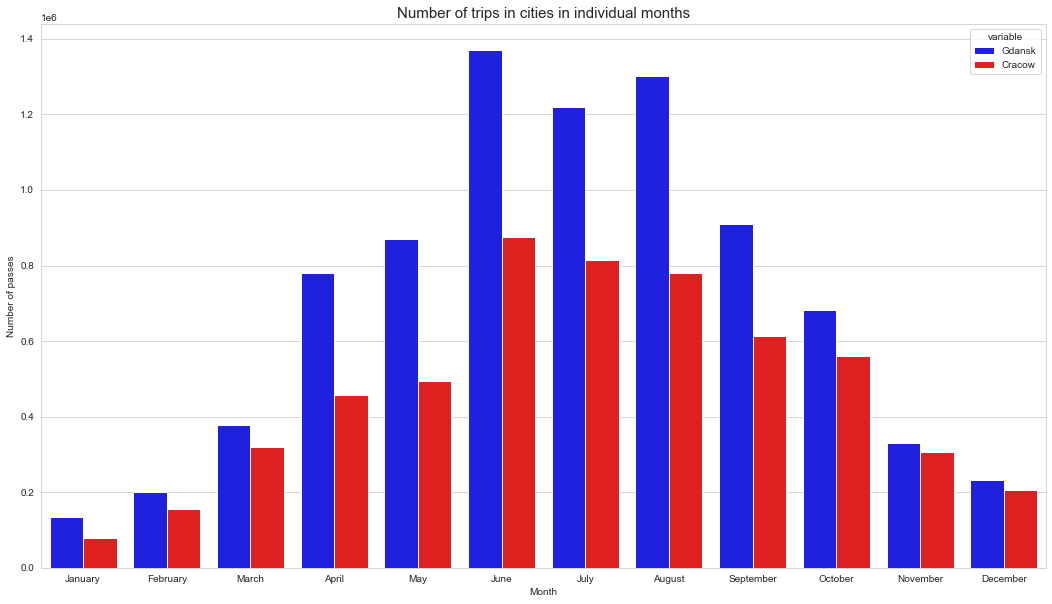

In [12]:
plt.title('Number of trips in cities in individual months', fontsize=15)
sns.barplot(data=melt,x='month_name',y='value',hue='variable', ci=None, estimator=lambda x: sum(x), palette=['blue','red'])
plt.xticks(range(0,12),labels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.xlabel('Month')
plt.ylabel('Number of passes')
plt.show()

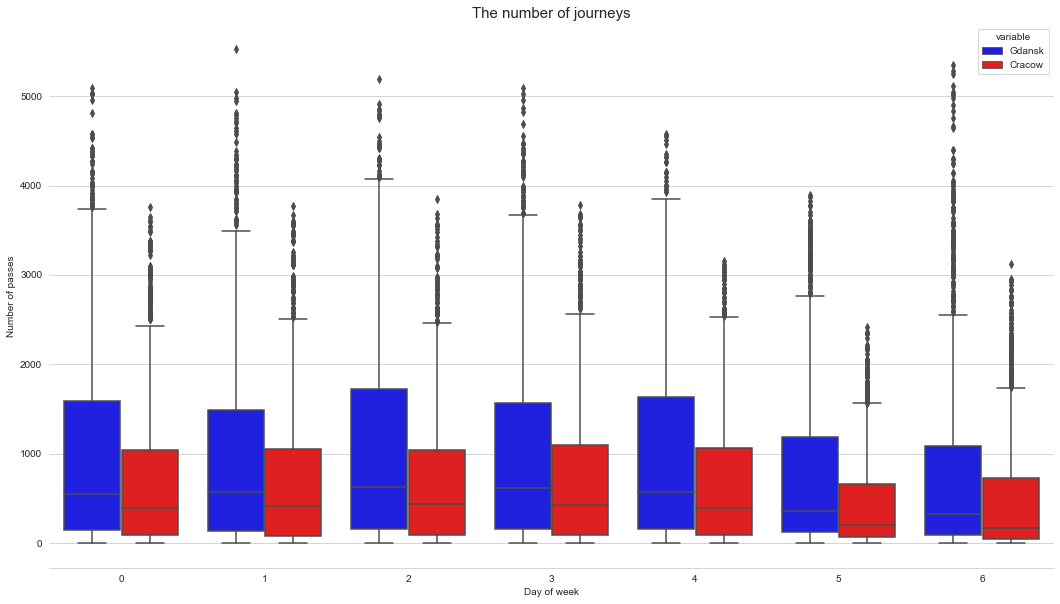

In [13]:
sns.boxplot(data=melt, x="day_of_week", y="value", hue="variable", palette=['blue','red'])
plt.title('The number of journeys', fontsize=15)
plt.xlabel('Day of week')
plt.ylabel('Number of passes')
sns.despine(left=True)

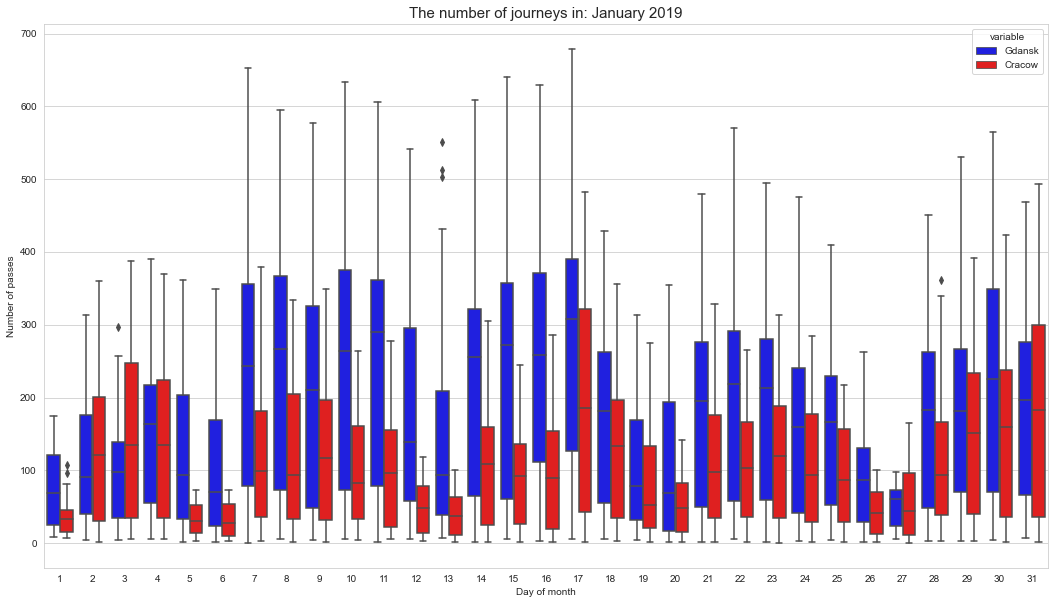

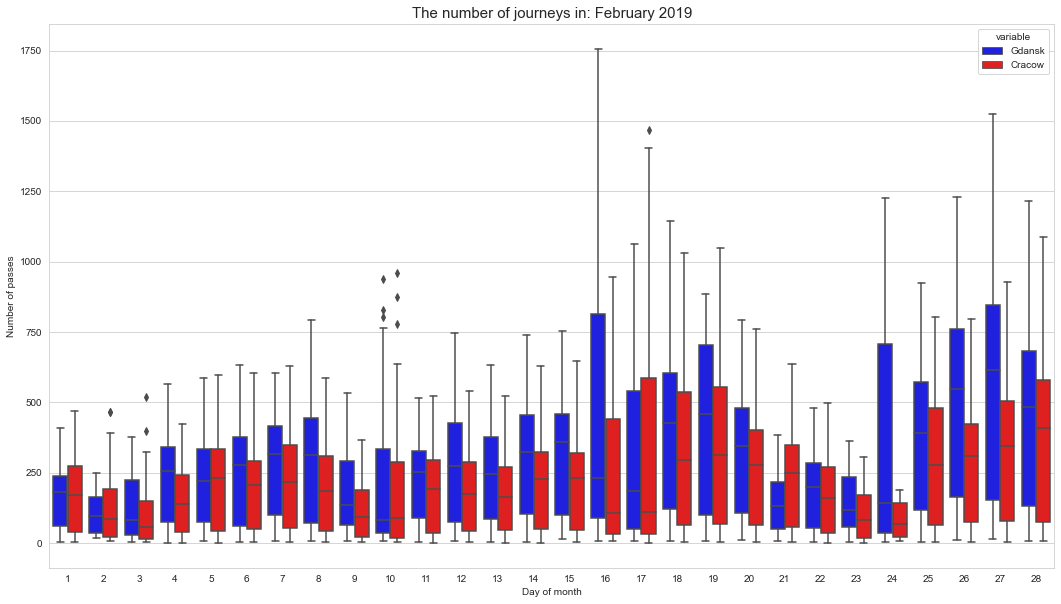

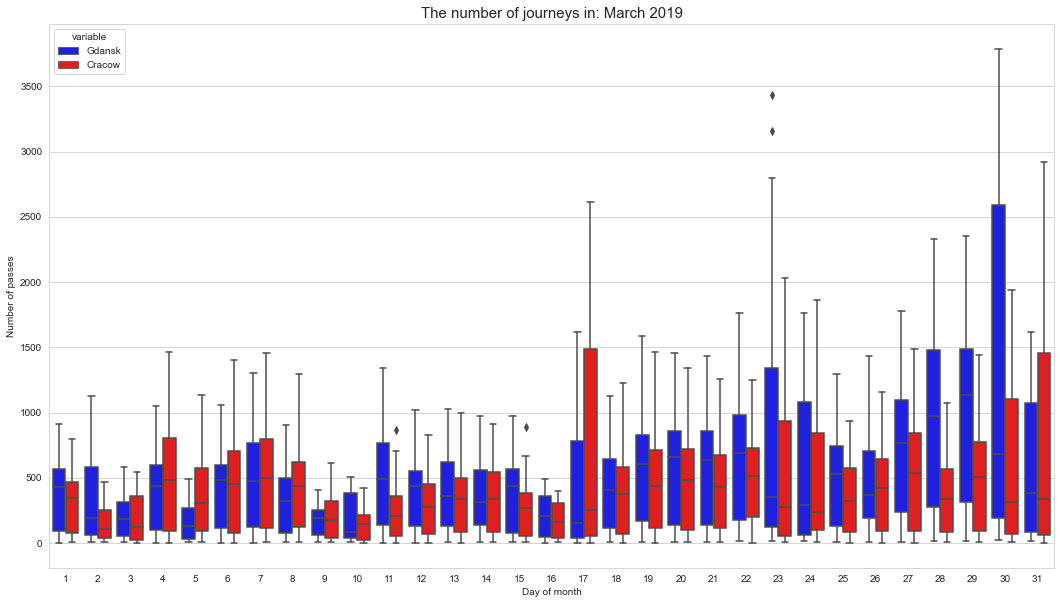

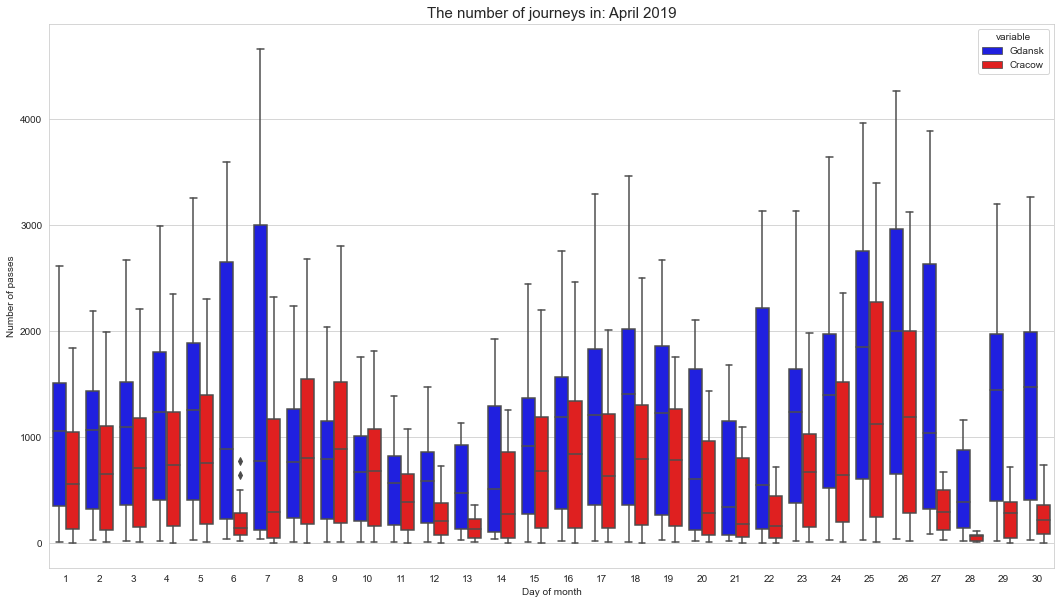

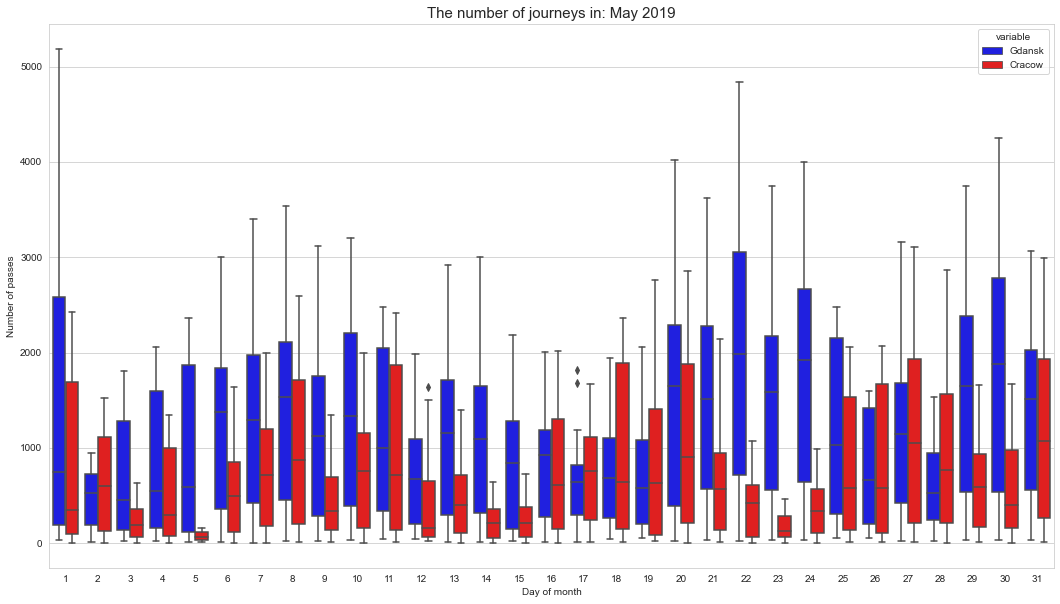

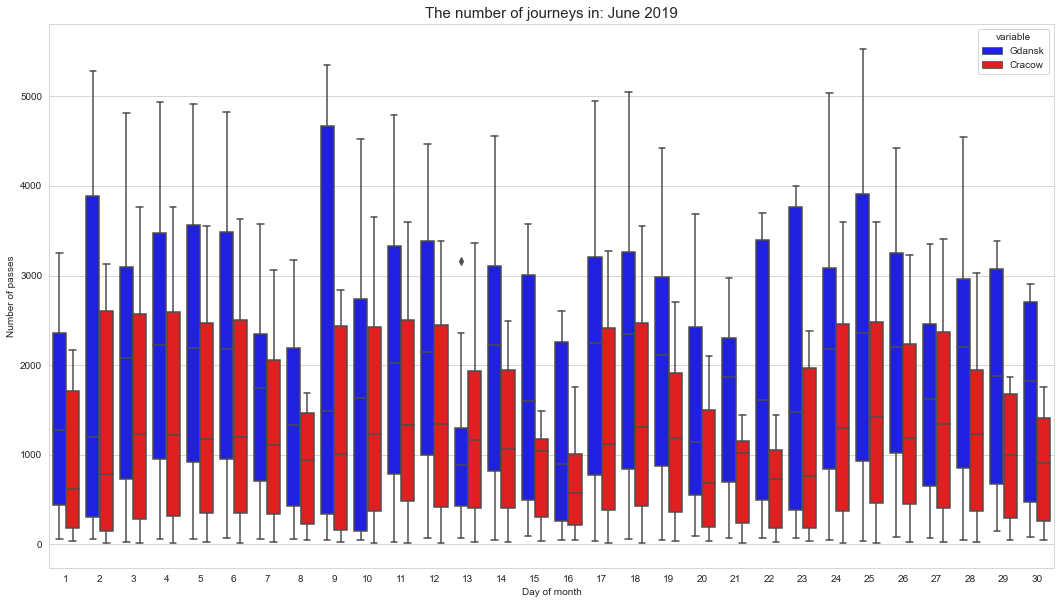

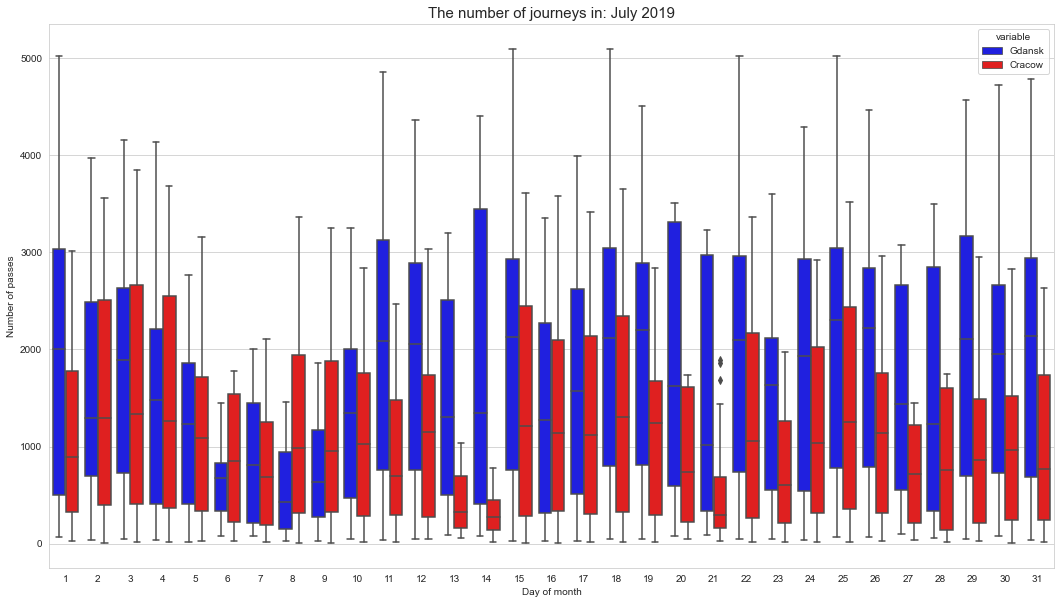

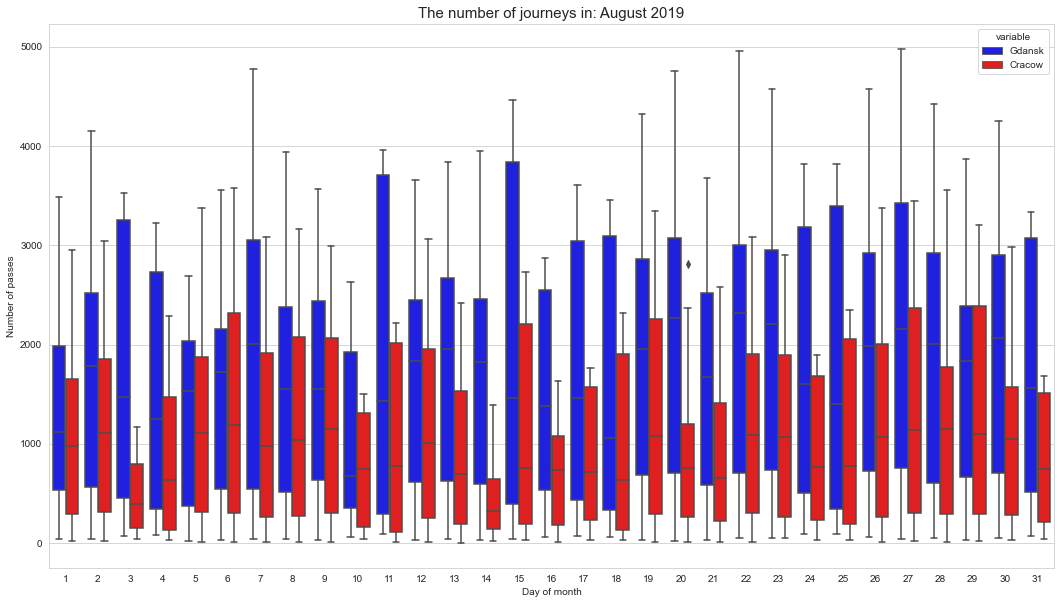

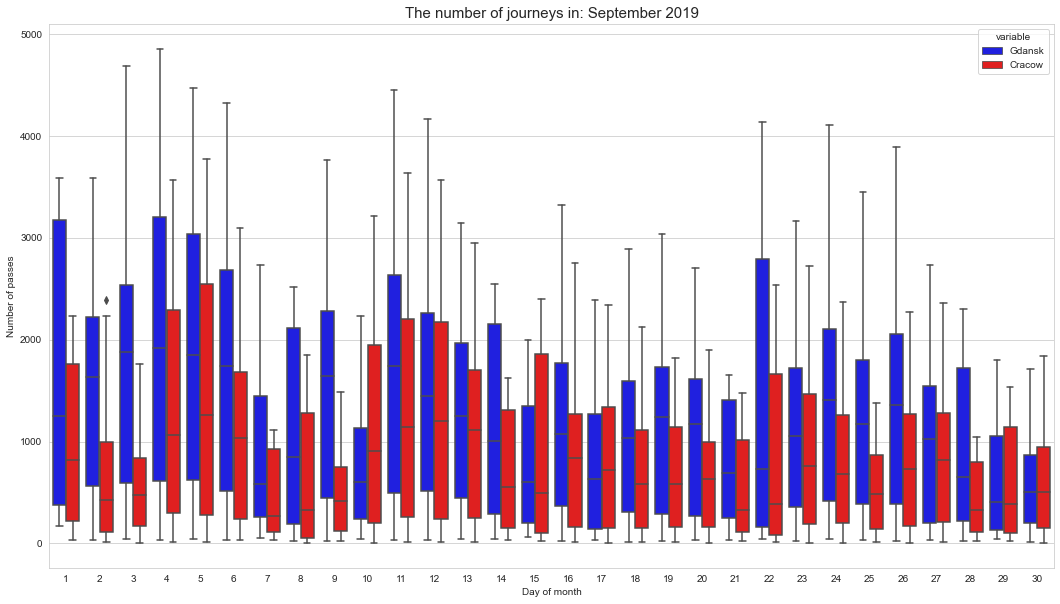

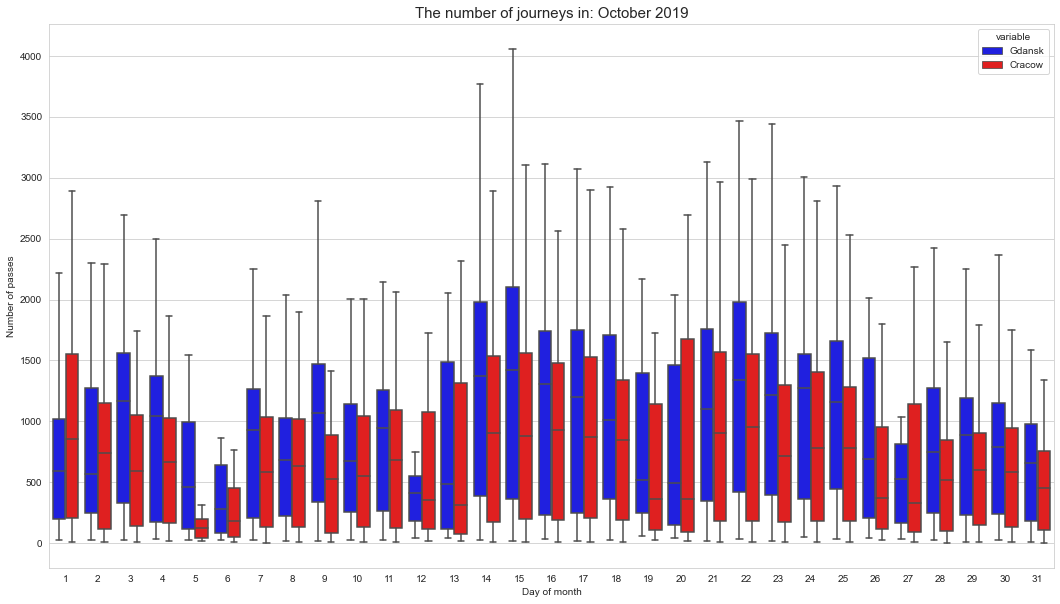

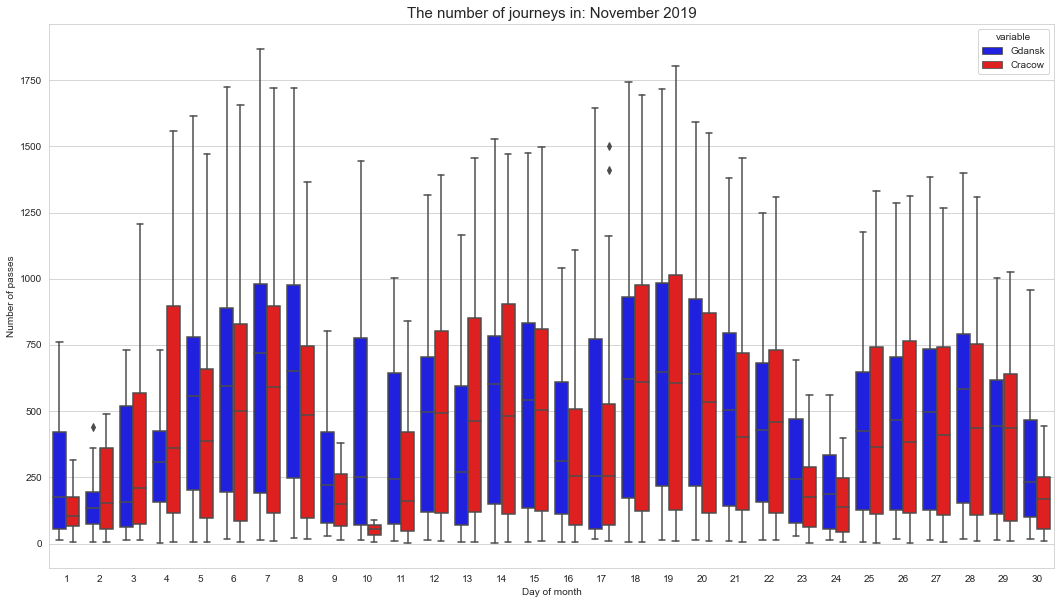

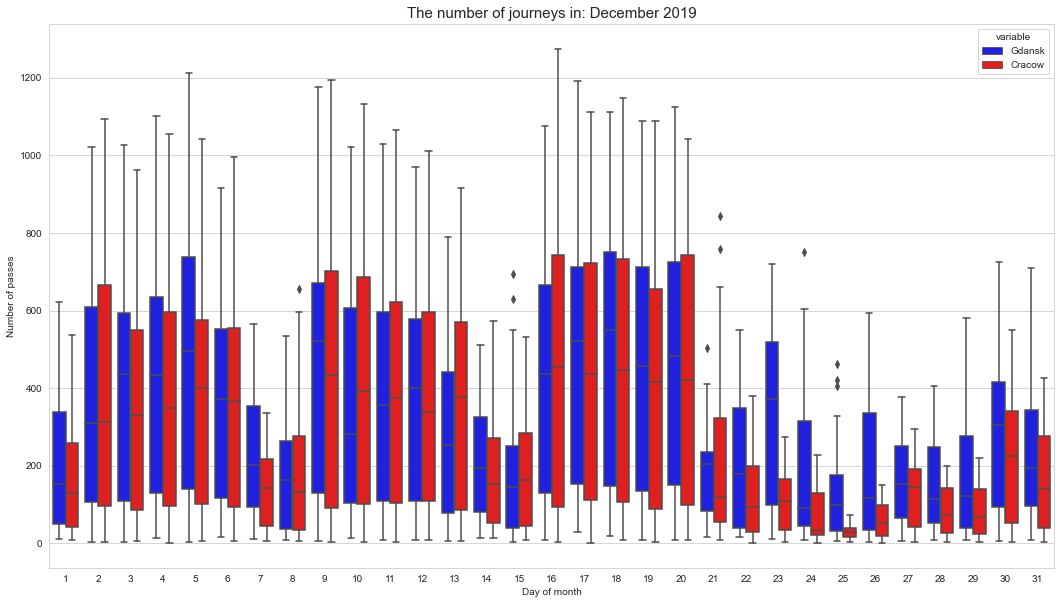

In [14]:
for i, month in zip(melt.month.unique(),melt.month_name.unique()):
    plt.title(f'The number of journeys in: {month} 2019', fontsize=15)
    sns.boxplot(data=melt,x=melt[melt.month==i].day,y='value',hue='variable', palette=['blue','red'])
    plt.xlabel('Day of month')
    plt.ylabel('Number of passes')
    plt.show()

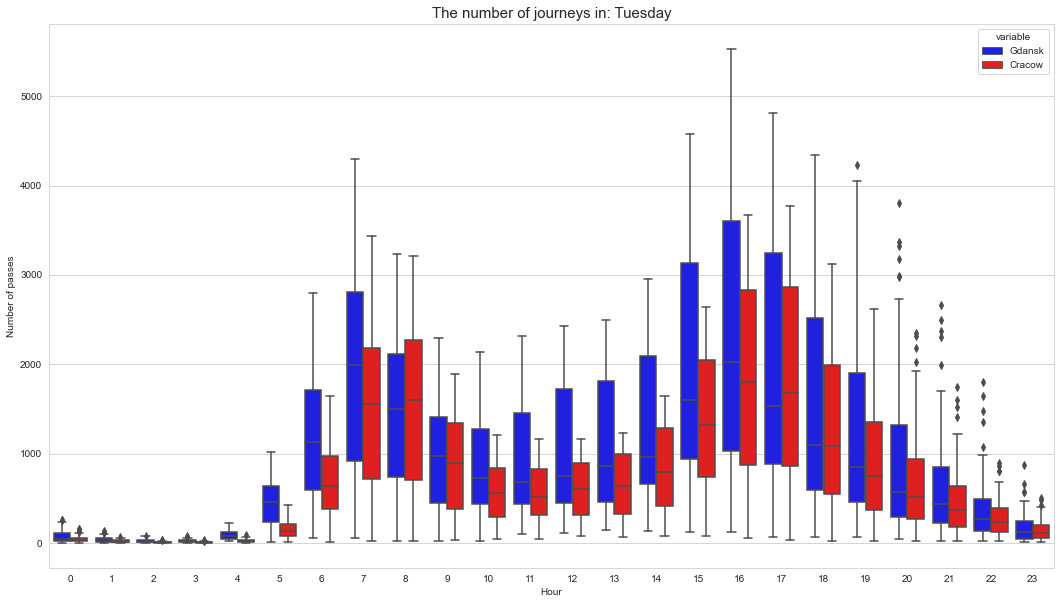

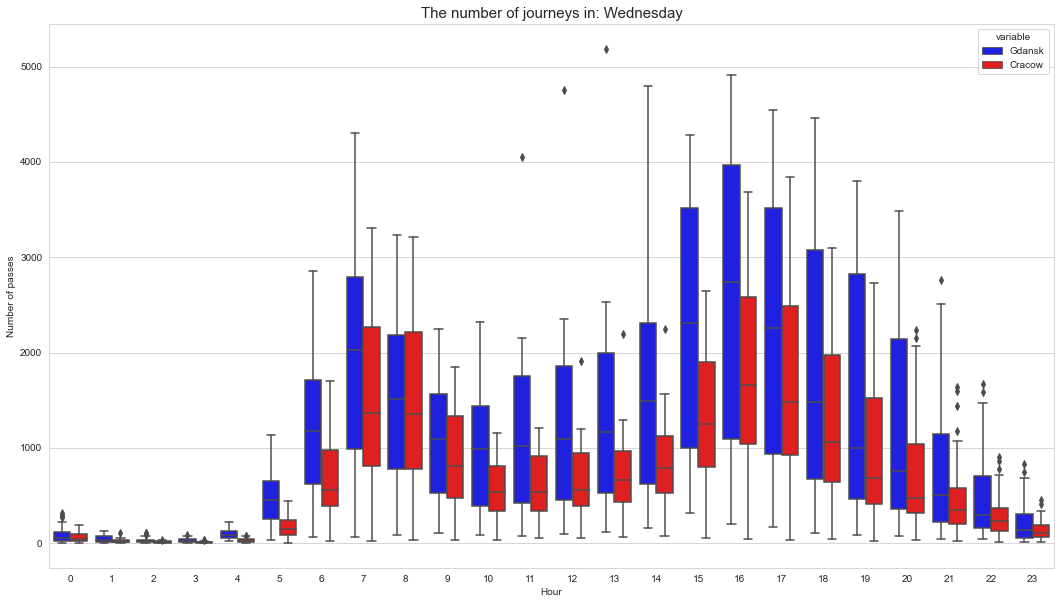

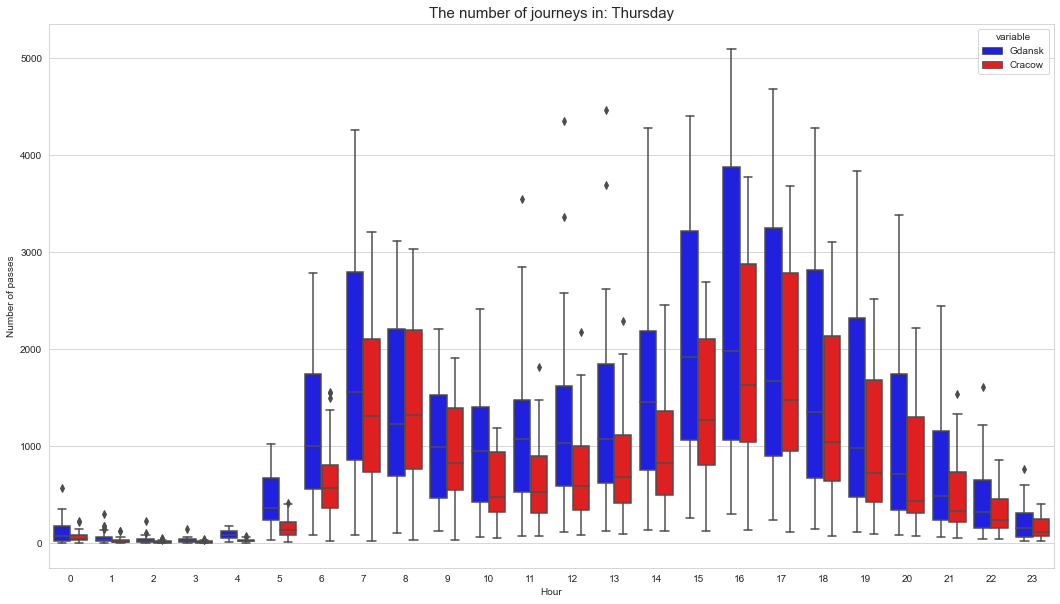

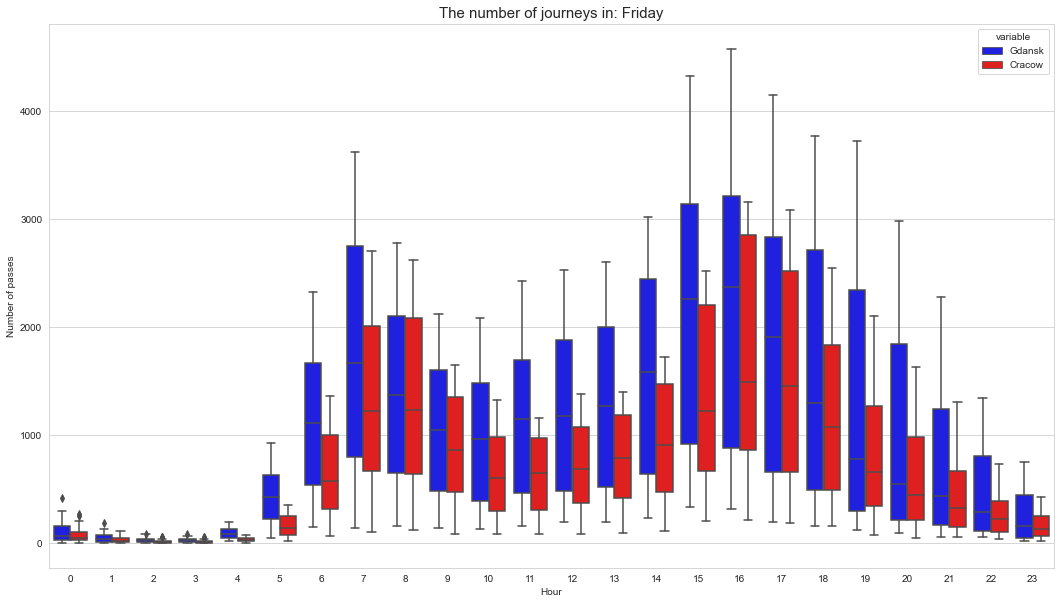

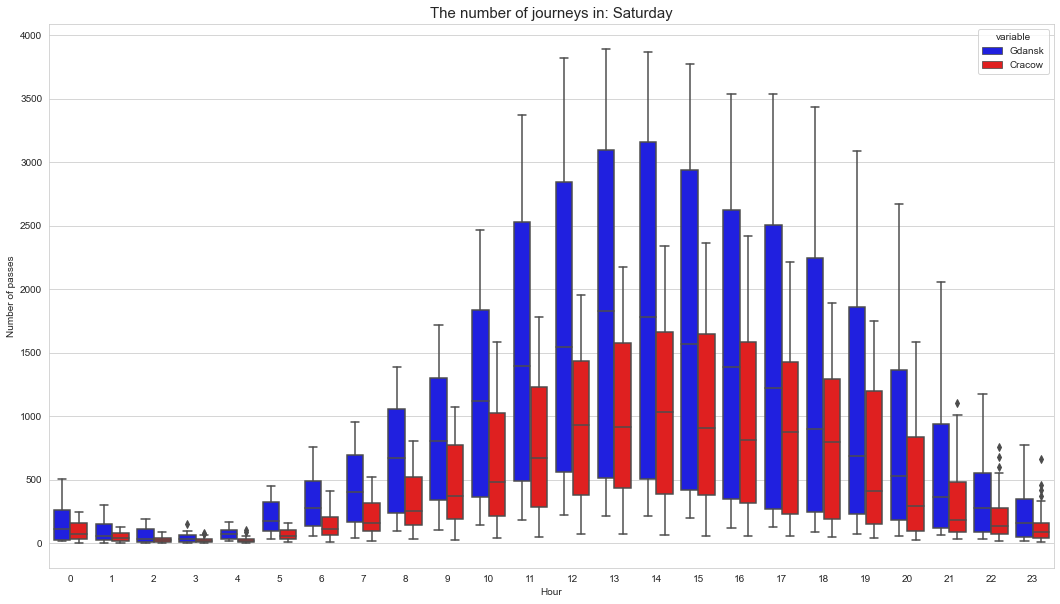

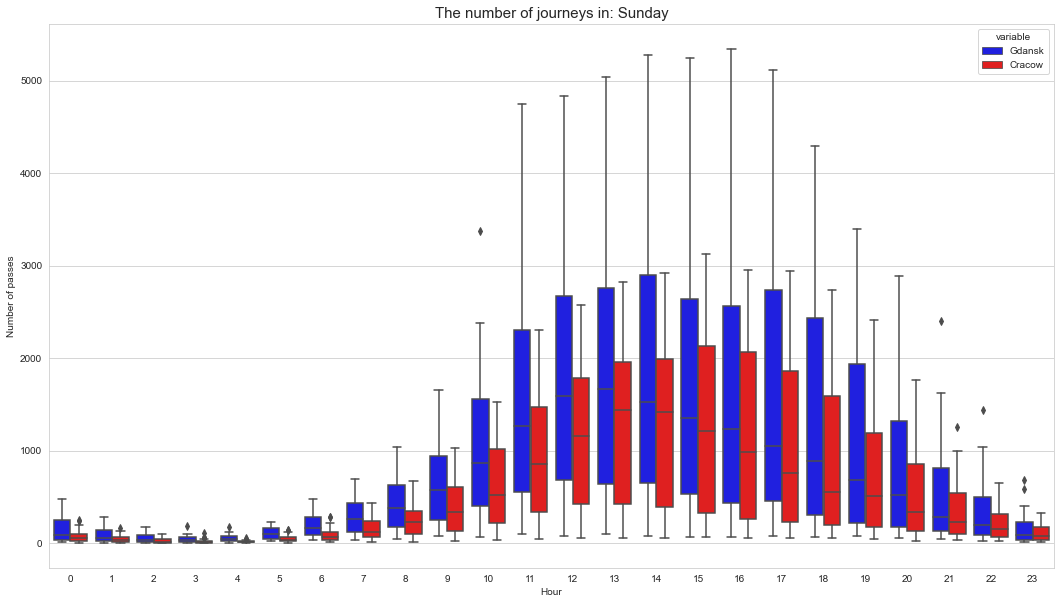

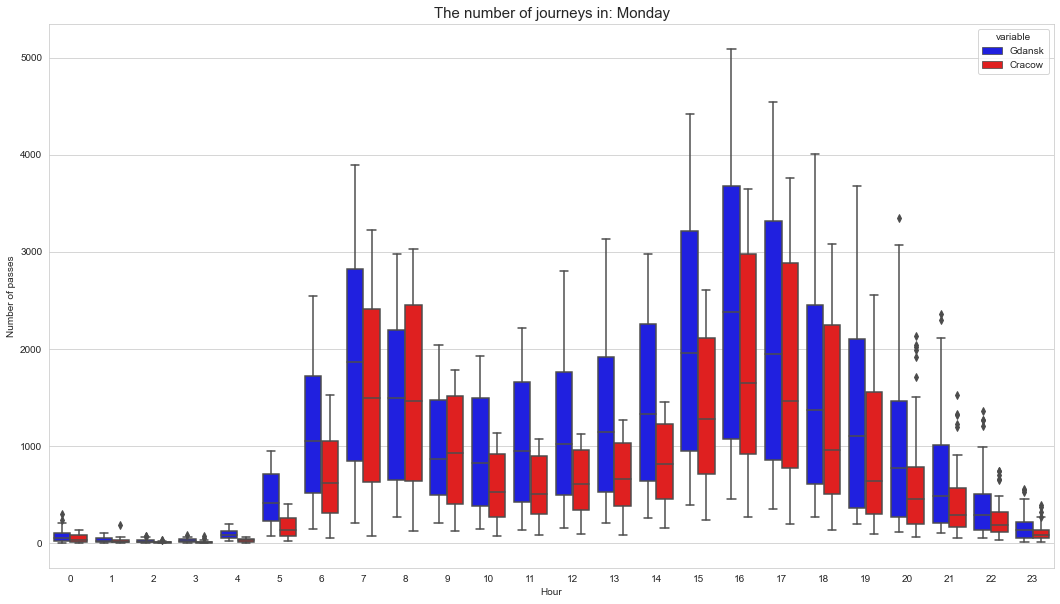

In [15]:
for i, h in zip(melt.day_name.unique(), melt.hour.unique()):
    plt.title(f'The number of journeys in: {i}', fontsize=15)
    sns.boxplot(data=melt, x=melt[melt.day_name==i].hour, y='value', hue='variable', palette=['blue','red'])
    plt.xlabel('Hour')
    plt.ylabel('Number of passes')
    plt.show()

In [16]:
for i in range(0,len(melt)):
    if melt.loc[i,'variable']=='Gdansk':
        melt.loc[i,'month_jitter']=melt.loc[i,'month']-.1
    else:
        melt.loc[i,'month_jitter']=melt.loc[i,'month']+.1
        
for i in range(0,len(melt)):
    if melt.loc[i,'variable']=='Gdansk':
        melt.loc[i,'day_of_week_jitter']=melt.loc[i,'day_of_week']-.15
    else:
        melt.loc[i,'day_of_week_jitter']=melt.loc[i,'day_of_week']+.15

In [17]:
melt['day'] = [week(x) for x in melt.day_of_week]

In [18]:
melt['time_of_day'] = [time_of_day(x) for x in melt.hour]

In [19]:
day = melt.groupby(['variable','day','time_of_day']).agg({'value':'mean','month_jitter':'mean','day_of_week_jitter':'mean' })

In [20]:
day2= melt.groupby(['variable','month','day_of_week']).agg({'value':'sum','month_jitter':'mean','day_of_week_jitter':'mean' })

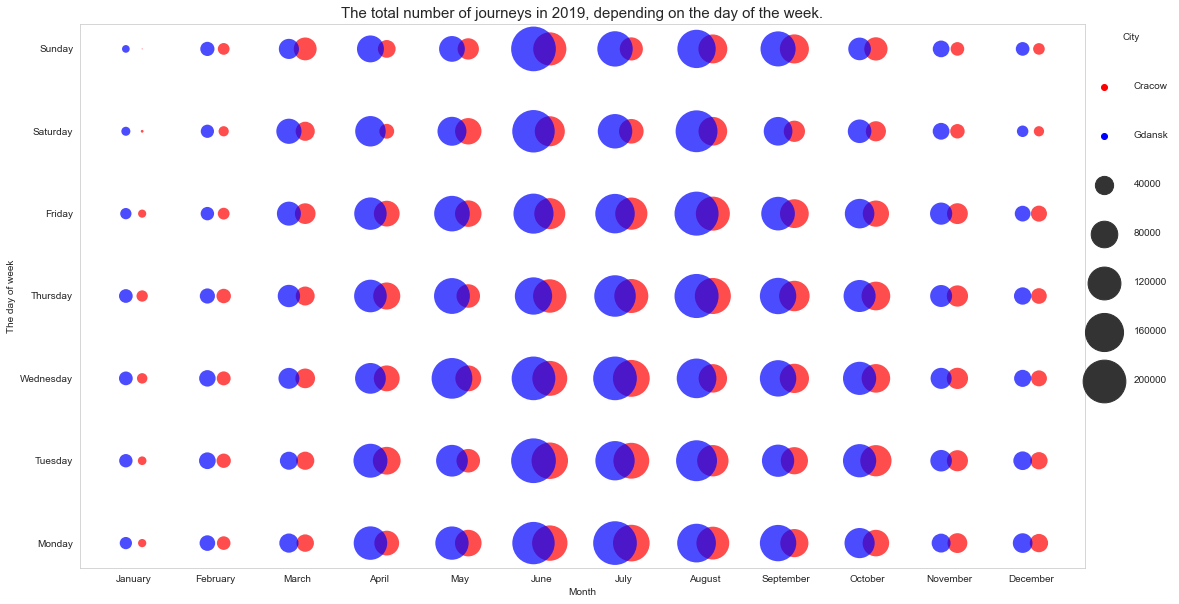

In [21]:
ax=sns.scatterplot(data=day2, x="month_jitter", y="day_of_week", size = 'value', hue ='variable', 
                   alpha = 0.7, 
                   sizes=(1, 2000), 
                   marker="o", 
                   palette=['red','blue'],
                   linewidth=0)
ax.grid()

plt.title('The total number of journeys in 2019, depending on the day of the week.', fontsize=15)
plt.ylabel('The day of week')
plt.xlabel('Month')
plt.xticks(range(1,13),labels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.yticks(range(0,7),labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
handles, labels = ax.get_legend_handles_labels()
labels.pop(0)
labels.pop(2)
handles.pop(0)
handles.pop(2)
ax.legend(handles=handles, labels=labels,title='City',loc='upper left', ncol=1,frameon=False, bbox_to_anchor=(1,1),labelspacing=4, handletextpad=2)

plt.show()

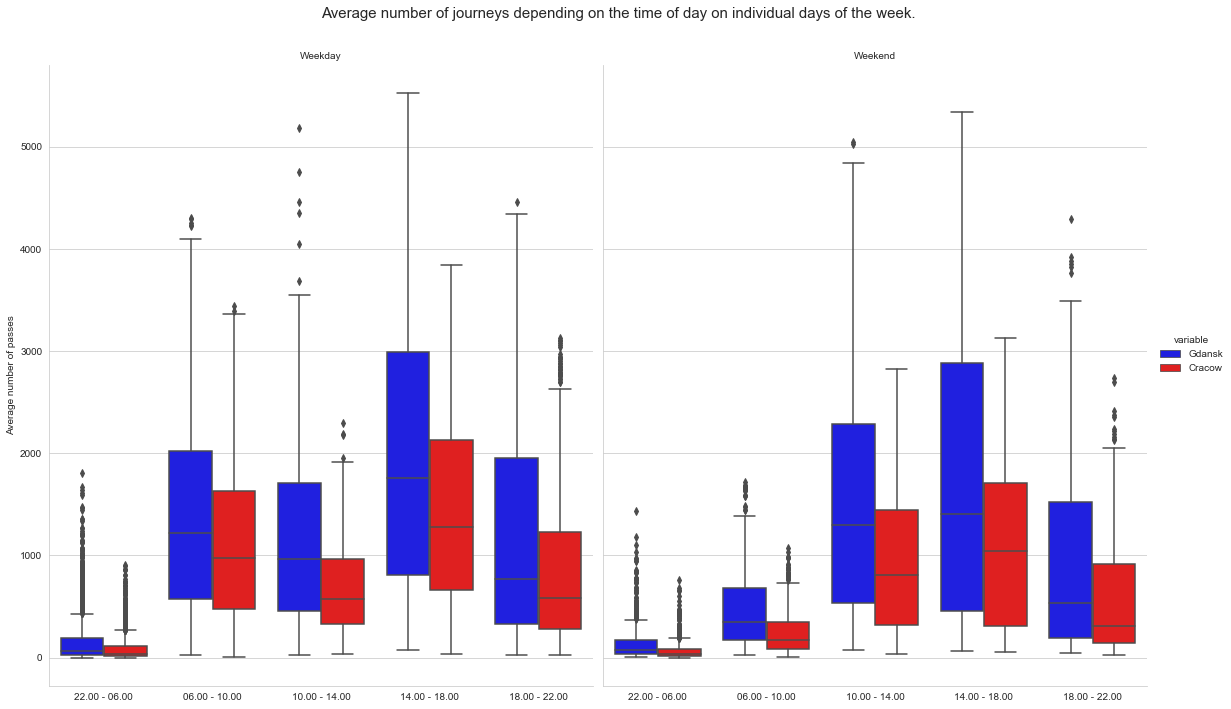

In [22]:
g = sns.catplot(data=melt, x='time_of_day', y='value', hue='variable', col='day',kind='box', height=10, aspect=.8, palette=['blue','red'])
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Average number of journeys depending on the time of day on individual days of the week.', fontsize=15) 
(g.set_axis_labels("", "Average number of passes")
  .set_xticklabels(['22.00 - 06.00','06.00 - 10.00','10.00 - 14.00','14.00 - 18.00','18.00 - 22.00'])
  .set_titles("{col_name}", fontsize=15)
  )
plt.show()

In [23]:
cracow

,Journeys,day,hour,day_of_week,day_name,month,month_name,Date,Cloud_cover,Wind_speed,Temperature,Pressure,Precipitation,Season,comp_0,comp_1,comp_2,comp_3,comp_4
0,13.0,1,0,1,Tuesday,1,January,2019-01-01,7.333333,5.625,2.550000,988.370833,0.091667,4,1.709407,-1.004130,-0.410442,0.899036,-0.124129
1,15.0,1,1,1,Tuesday,1,January,2019-01-01,7.333333,5.625,2.550000,988.370833,0.091667,4,1.709407,-1.004130,-0.410442,0.899036,-0.124129
2,19.0,1,2,1,Tuesday,1,January,2019-01-01,7.333333,5.625,2.550000,988.370833,0.091667,4,1.709407,-1.004130,-0.410442,0.899036,-0.124129
3,12.0,1,3,1,Tuesday,1,January,2019-01-01,7.333333,5.625,2.550000,988.370833,0.091667,4,1.709407,-1.004130,-0.410442,0.899036,-0.124129
4,11.0,1,4,1,Tuesday,1,January,2019-01-01,7.333333,5.625,2.550000,988.370833,0.091667,4,1.709407,-1.004130,-0.410442,0.899036,-0.124129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,88.0,31,19,1,Tuesday,12,December,2019-12-31,6.083333,6.625,4.433333,995.616667,0.000000,4,1.008390,-1.539932,-0.916919,1.807283,-0.172421
8756,60.0,31,20,1,Tuesday,12,December,2019-12-31,6.083333,6.625,4.433333,995.616667,0.000000,4,1.008390,-1.539932,-0.916919,1.807283,-0.172421
8757,35.0,31,21,1,Tuesday,12,December,2019-12-31,6.083333,6.625,4.433333,995.616667,0.000000,4,1.008390,-1.539932,-0.916919,1.807283,-0.172421
8758,45.0,31,22,1,Tuesday,12,December,2019-12-31,6.083333,6.625,4.433333,995.616667,0.000000,4,1.008390,-1.539932,-0.916919,1.807283,-0.172421


In [25]:
gdansk_agg = gdansk.groupby('Date').agg({'Journeys':'sum','Temperature': 'mean','Season':'max'}).reset_index()
cracow_agg = cracow.groupby('Date').agg({'Journeys':'sum','Temperature': 'mean','Season':'max'}).reset_index()

In [26]:
cracow_agg

,Date,Journeys,Temperature,Season
0,2019-01-01,895.0,2.550000,4
1,2019-01-02,3209.0,0.379167,4
2,2019-01-03,3672.0,-2.662500,4
3,2019-01-04,3457.0,-3.225000,4
4,2019-01-05,804.0,0.708333,4
...,...,...,...,...
360,2019-12-27,3039.0,2.029167,4
361,2019-12-28,1984.0,-0.029167,4
362,2019-12-29,2083.0,-1.341667,4
363,2019-12-30,5399.0,0.125000,4


In [27]:
gdansk_agg.rename(columns={'Temperature':'Temperature_Gdansk','Journeys':'Journeys_Gdansk','Season':'Season_Gdansk'},inplace=True)
cracow_agg.rename(columns={'Temperature':'Temperature_Cracow','Journeys':'Journeys_Cracow','Season':'Season_Cracow', 'data':'Date'},inplace=True)

In [28]:
comparison_weather = pd.merge(gdansk_agg, cracow_agg, on='Date')

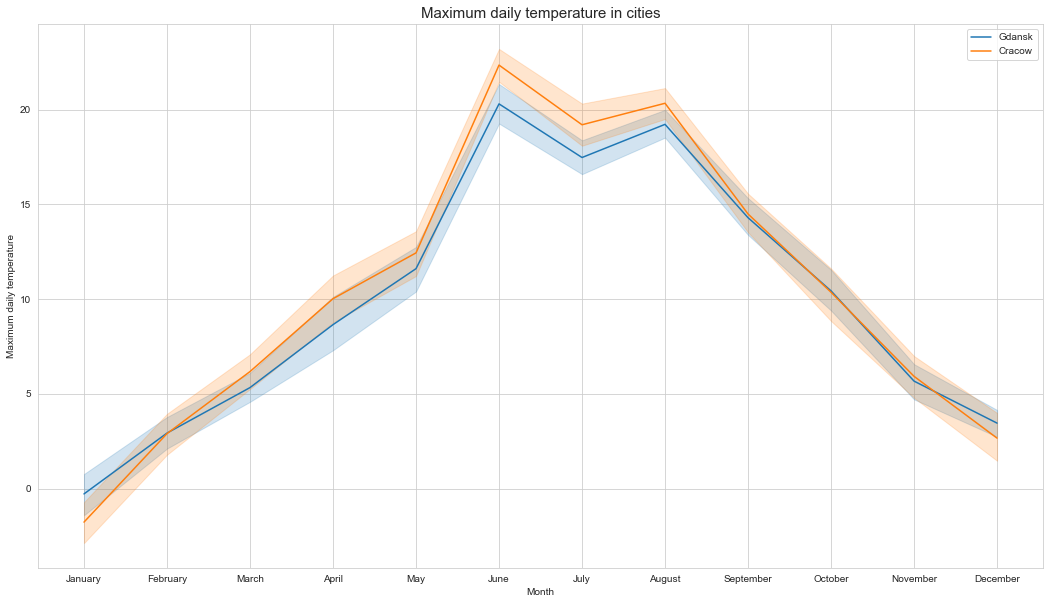

In [29]:
plt.title('Maximum daily temperature in cities', fontsize=15)
sns.lineplot(data = comparison_weather, x = comparison_weather.Date.dt.month, y = comparison_weather.Temperature_Gdansk)
sns.lineplot(data = comparison_weather, x = comparison_weather.Date.dt.month, y = comparison_weather.Temperature_Cracow)
plt.legend(['Gdansk','Cracow'])
plt.xticks(range(1,13),labels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.xlabel('Month')
plt.ylabel('Maximum daily temperature')
plt.show()

In [30]:
cw_copy = comparison_weather.copy()

In [31]:
cw_copy.drop('Season_Cracow',axis=1,inplace=True)
cw_copy.rename(columns={'Season_Gdansk':'Season'}, inplace=True)

In [32]:
cw_copy['day'] = cw_copy.Date.dt.day

In [33]:
cw_copy['hour'] = cw_copy.Date.dt.hour
cw_copy['day_of_week'] = cw_copy.Date.dt.dayofweek
cw_copy['day_name'] = cw_copy.Date.dt.day_name()
cw_copy['month'] = cw_copy.Date.dt.month
cw_copy['month_name'] = cw_copy.Date.dt.month_name()
cw_copy['Season'] = [seasons_def(x) for x in cw_copy.Season]
cw_copy

,Date,Journeys_Gdansk,Temperature_Gdansk,Season,Journeys_Cracow,Temperature_Cracow,day,hour,day_of_week,day_name,month,month_name
0,2019-01-01,1709.0,5.254167,Winter,895.0,2.550000,1,0,1,Tuesday,1,January
1,2019-01-02,2827.0,1.745833,Winter,3209.0,0.379167,2,0,2,Wednesday,1,January
2,2019-01-03,2569.0,0.745833,Winter,3672.0,-2.662500,3,0,3,Thursday,1,January
3,2019-01-04,3660.0,0.491667,Winter,3457.0,-3.225000,4,0,4,Friday,1,January
4,2019-01-05,3117.0,3.141667,Winter,804.0,0.708333,5,0,5,Saturday,1,January
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,3938.0,3.366667,Winter,3039.0,2.029167,27,0,4,Friday,12,December
361,2019-12-28,3605.0,2.300000,Winter,1984.0,-0.029167,28,0,5,Saturday,12,December
362,2019-12-29,4499.0,1.758333,Winter,2083.0,-1.341667,29,0,6,Sunday,12,December
363,2019-12-30,6721.0,3.925000,Winter,5399.0,0.125000,30,0,0,Monday,12,December


In [34]:
melt = cw_copy.melt(id_vars=["Date","Journeys_Gdansk","Season","Journeys_Cracow","day","hour","day_of_week","day_name","month","month_name"])

In [35]:
melt

,Date,Journeys_Gdansk,Season,Journeys_Cracow,day,hour,day_of_week,day_name,month,month_name,variable,value
0,2019-01-01,1709.0,Winter,895.0,1,0,1,Tuesday,1,January,Temperature_Gdansk,5.254167
1,2019-01-02,2827.0,Winter,3209.0,2,0,2,Wednesday,1,January,Temperature_Gdansk,1.745833
2,2019-01-03,2569.0,Winter,3672.0,3,0,3,Thursday,1,January,Temperature_Gdansk,0.745833
3,2019-01-04,3660.0,Winter,3457.0,4,0,4,Friday,1,January,Temperature_Gdansk,0.491667
4,2019-01-05,3117.0,Winter,804.0,5,0,5,Saturday,1,January,Temperature_Gdansk,3.141667
...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,3938.0,Winter,3039.0,27,0,4,Friday,12,December,Temperature_Cracow,2.029167
726,2019-12-28,3605.0,Winter,1984.0,28,0,5,Saturday,12,December,Temperature_Cracow,-0.029167
727,2019-12-29,4499.0,Winter,2083.0,29,0,6,Sunday,12,December,Temperature_Cracow,-1.341667
728,2019-12-30,6721.0,Winter,5399.0,30,0,0,Monday,12,December,Temperature_Cracow,0.125000


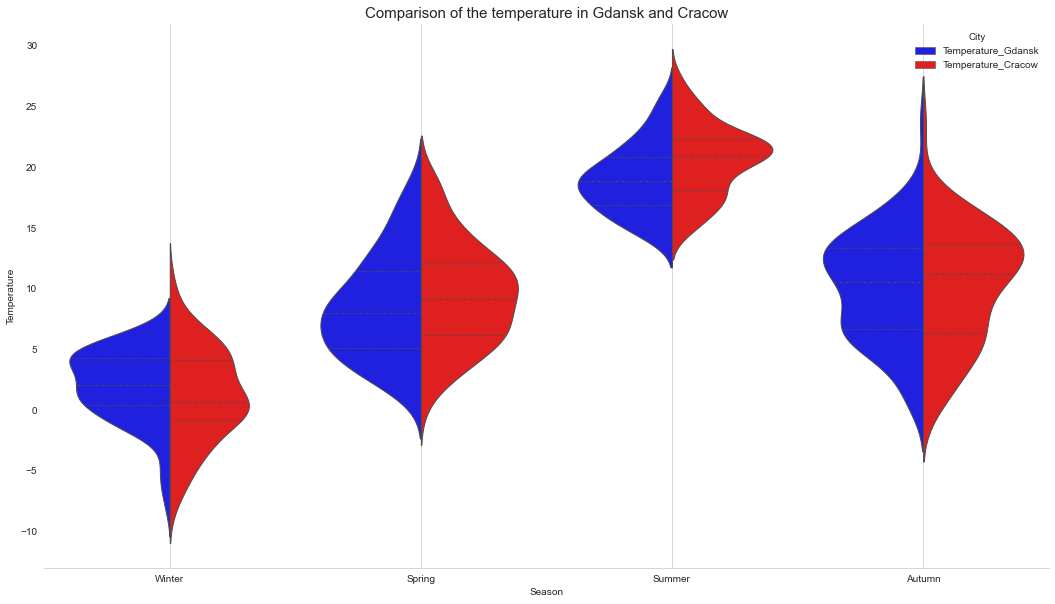

In [36]:
ax = sns.violinplot(melt.Season, melt.value, hue = melt.variable,
               split=True, inner="quart", linewidth=1,
               palette={"Temperature_Gdansk": "b", "Temperature_Cracow": "r"})
sns.despine(left=True)
plt.title("Comparison of the temperature in Gdansk and Cracow",fontsize=15)
plt.grid(which="major")
plt.ylabel('Temperature')
plt.xlabel('Season')
handles, labels = ax.get_legend_handles_labels()
ax.legend(title='City', ncol=1,frameon=False)
plt.show()

In [37]:
journeys_melt = cw_copy.melt(id_vars=["Date","Temperature_Gdansk","Season","Temperature_Cracow","day","hour","day_of_week","day_name","month","month_name"])

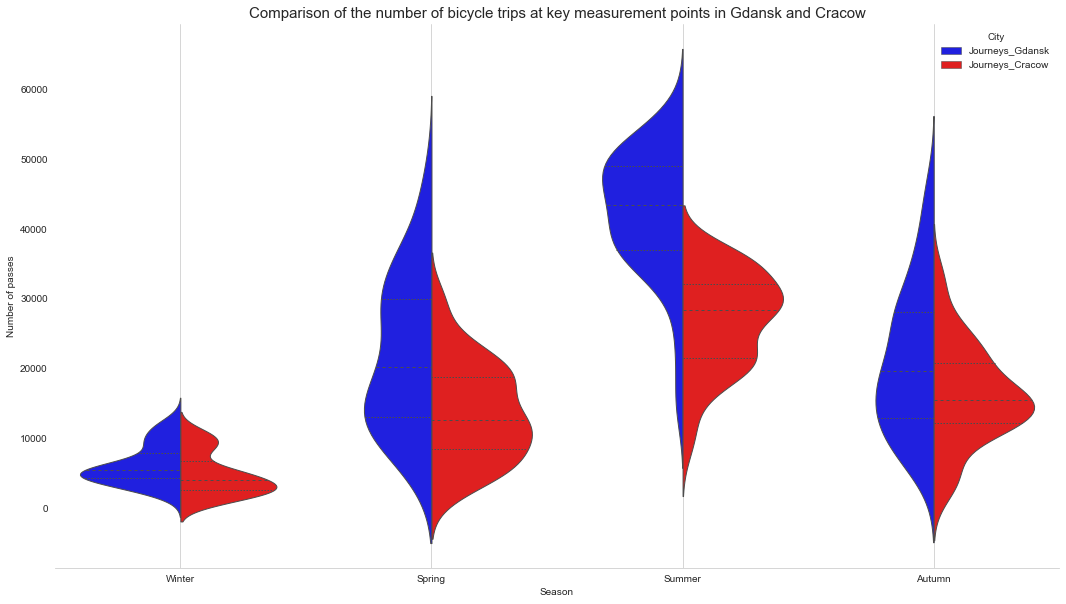

In [38]:
ax = sns.violinplot(journeys_melt.Season,journeys_melt.value, hue=journeys_melt.variable,
               split=True, inner="quart", linewidth=1,
               palette={"Journeys_Gdansk": "b", "Journeys_Cracow": "r"})
sns.despine(left=True)
plt.title("Comparison of the number of bicycle trips at key measurement points in Gdansk and Cracow",fontsize=15)
plt.grid(which="major")
plt.ylabel('Number of passes')
plt.xlabel('Season')
handles, labels = ax.get_legend_handles_labels()
ax.legend(title='City', ncol=1,frameon=False)
plt.show()